# Exercises for Video Lecture 2
Corresponds to Chapters 2 & 3 of the book.

In [21]:
import arviz as az
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import binom

from stats_helpers import binomial_posterior, binomial_ppd

# Set the style from the mplstyle file
STYLE = "../statistical-rethinking-2023.mplstyle"
style.use(STYLE)


## Chapter 2
### Exercise 2M1
Recall the globe tossing model from the chapter. Compute and plot the 
grid approximate posterior distribution for each of the following sets of observations.
In each case, assume a uniform prior for $p$.
1. W, W, W
2. W, W, W, L
3. L, W, W, L, W, W, W

In [22]:
data_samples = [
    "WWW",
    "WWWL",
    "LWWLWWW"
]
# Convert the data samples to boolean arrays
data_arrays = [
    np.array([i == "W" for i in sample]) for sample in data_samples
]

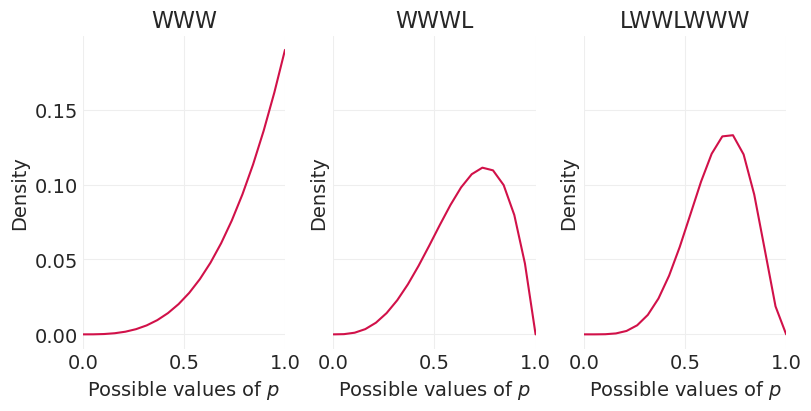

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(8, 4), sharey=True, sharex=True)

density_xlabel = "Possible values of $p$"
density_ylabel = "Density"

for i, sample in enumerate(data_samples):
    arr = data_arrays[i]
    axi = ax[i]
    p_grid, posterior = binomial_posterior(arr, 20)
    axi.plot(p_grid, posterior)
    axi.set_xlim(0, 1)
    axi.set_title(sample)
    axi.set_xlabel(density_xlabel)
    axi.set_ylabel(density_ylabel)

## Exercise 2M2
Now assume a prior for $p$ that is equal to zero when $p < 0.5$ and
is a positive constant when $p ≥ 0.5$.

Again compute and plot the grid approximate posterior distribution
for each of the sets of observations in the problem just above.

In [24]:
# Prior is defined on the [0, 1] interval and is 0 before 0.5 and uniform
# after 0.5. The values > 0.5 are set to 2 to make th integral sum to 1.
modified_prior = np.zeros(20)
modified_prior[10:] = 2 


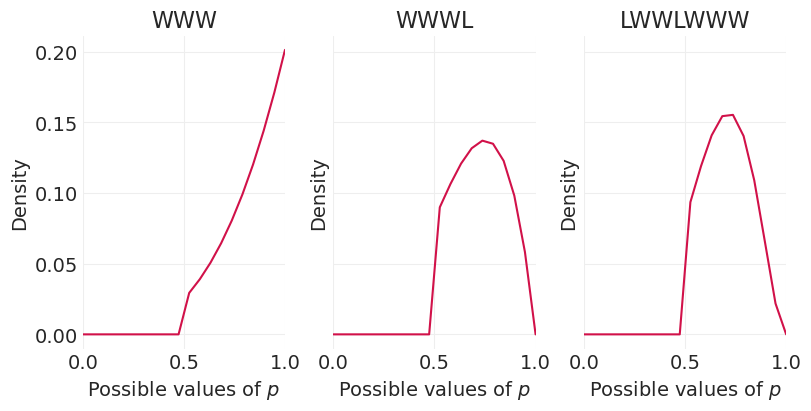

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(8, 4), sharey=True, sharex=True)

for i, sample in enumerate(data_samples):
    arr = data_arrays[i]
    axi = ax[i]
    p_grid, posterior = binomial_posterior(arr, 20, prior=modified_prior)
    axi.plot(p_grid, posterior)
    axi.set_xlim(0, 1)
    axi.set_title(sample)
    axi.set_xlabel(density_xlabel)
    axi.set_ylabel(density_ylabel)

## Chapter 3
The following Easy problems use the samples from the posterior 
distribution for the globe tossing example.

This code will give you a specific set of samples,
so that you can check your answers exactly.

This is the R code:
```r
p_grid <-seq(from=0,to=1,length.out=1000)
prior <-rep(1,1000)
likelihood <-dbinom(6,size=9,prob=p_grid)
posterior <-likelihood*prior
posterior <-posterior/sum(posterior)
set.seed(100)
samples <-sample(p_grid,prob=posterior,size=1e4,replace=TRUE)
```

And below is the equivalent Python code:

In [26]:
p_grid = np.linspace(0, 1, 1000)
prior = np.ones(1000)
likelihood = binom.pmf(6, 9, p_grid)
posterior = prior * likelihood
posterior /= np.sum(posterior)
rng = np.random.default_rng(100)
samples = rng.choice(p_grid, size=1_000, replace=True, p=posterior)

### Exercises 3E1 - 3E7
- How much posterior probability lies below $p = 0.2$?
- How much posterior probability lies above $p = 0.8$?
- How much posterior probability lies between $p = 0.2$ and $p = 0.8$?

In [27]:
print((samples < 0.2).mean())
print((samples > 0.8).mean())
print(((samples > 0.2) & (samples < 0.8)).mean())

0.001
0.12
0.879


- 20% of the posterior probability lies below which value of $p$?
- 20% of the posterior probability lies above which value of $p$?

In [28]:
lower, upper = np.percentile(samples, [20, 80])
print(f"{lower:.2f} - {upper:.2f}")

0.53 - 0.76


- Which values of $p$ contain the narrowest interval equal to 66% of the posterior probability?
- Which values of $p$ contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [29]:
print("HDPI 66%")
lower, upper = az.hdi(samples, hdi_prob=0.66)
print(f"{lower:.2f} - {upper:.2f}")

print("\nPI 66%")
lower, upper = np.percentile(samples, [34/2, 100 - 34/2])
print(f"{lower:.2f} - {upper:.2f}")

HDPI 66%
0.53 - 0.78

PI 66%
0.52 - 0.77


### Exercise 3M1

Suppose the globe tossing data had turned out to be 8 water in 15 tosses.

Construct the posterior distribution, using grid approximation.

Use the same flat prior as before.

In [30]:
p_grid = np.linspace(0, 1, 1000)
prior = np.ones(1000)
likelihood = binom.pmf(8, 15, p_grid)
posterior = prior * likelihood
posterior /= np.sum(posterior)
rng = np.random.default_rng(100)

Text(0, 0.5, 'Density')

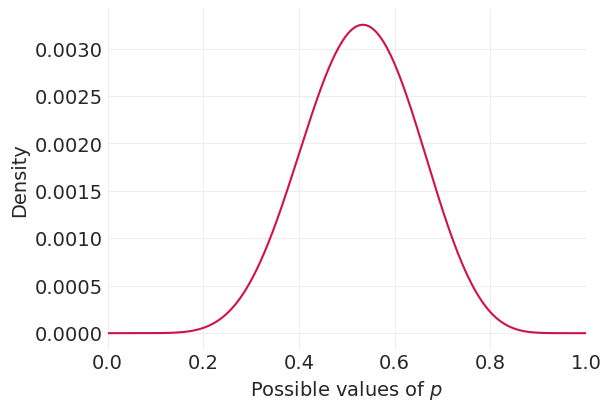

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(p_grid, posterior)
ax.set_xlim(0, 1)
ax.set_xlabel(density_xlabel)
ax.set_ylabel(density_ylabel)

### Exercise 3M2
Draw 10,000 samples from the grid approximation from above.

Then use the sample to calculate the 90% HPDI for p.

In [32]:
samples = rng.choice(p_grid, size=10_000, replace=True, p=posterior)

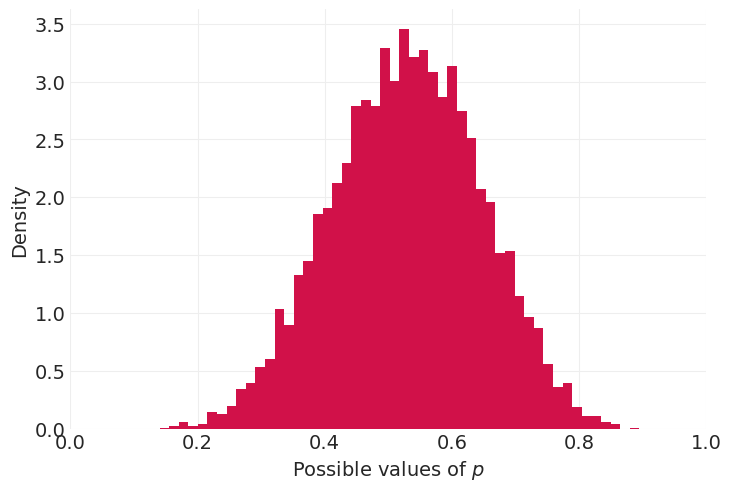

In [33]:
plt.hist(samples, bins=50, density=True)
plt.xlim(0, 1)
plt.xlabel("Possible values of $p$")
plt.ylabel("Density");

In [34]:
lower, upper = az.hdi(samples, hdi_prob=0.9)
print(f"{lower:.2f} - {upper:.2f}")

0.33 - 0.72


### Exercise 3M3
Construct a posterior predictive check for this model and data.

The means simulate the distribution of samples, averaging over the posterior uncertainty in p.

What is the probability of observing 8 water in 15 tosses?

In [35]:
# Compute the posterior predictive distribution by sampling from the posterior
# and then computing the binomial distribution for each sample.
ppd = binom.rvs(15, samples, size=10_000, random_state=rng)  # n ,p, size
print((ppd == 8).mean())


0.1502


### Exercise 3M4
Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

In [36]:
# Compute the probability of observing 6 water in 9 tosses given a posterior
# distribution of p.
ppd = binom.rvs(9, samples, size=10_000, random_state=rng)
print((ppd == 6).mean())

0.1847
